# Gaussian Pulses

Now that you have some understanding of how phase and frequency work in Fourier transforms (FTs) let's explore the relationship between the relative *widths* of a signal in the time and frequency domains. To do this we'll consider signals with the Gaussian form
$$ S(t) = \sin(2 \pi f_o (t-t_o) + \phi) e^{-\frac{(t-t_o)^2}{2 \tau^2}} $$
The parameter $f_o$ is again the "center" frequency of the pulse, while the off-set $t_o$ determines when the pulse peaks, and the pulse width $\tau$ controls its duration. (Note that two metrics for pulse width are commonly used here: $\tau$ as defined here represents the *standard deviation* of the Gaussian pulse shape, which is related to the *full width at half maximum* $\Gamma$ by the formula $\Gamma = 2\sqrt{2 \ln 2} \tau$).

In [1]:
from IPython.display import Javascript, display
from ipywidgets import widgets
import numpy as np
import math
import matplotlib.pyplot as plt

import IPython.display as ipd

# Define the time axis
fsamp = 22050 # sample rate (Hz)
dt = 1/fsamp  # Time step (seconds)
tstop = 1.0    # seconds
taxis = np.arange(0, tstop, dt)
Npts = len(taxis)

# Define the frequency axis
faxis = np.fft.fftfreq(Npts)/dt


def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))
    
phase_slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=2*math.pi,
    step=0.01,
    description='$\phi$:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

freq_slider = widgets.FloatSlider(
    value=110,
    min=50,
    max=440,
    step=0.01,
    description='$f_o$ (Hz):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

tau_slider = widgets.FloatSlider(
    value=tstop*1000*0.125*0.5,
    min=1.0,
    max=tstop*1000*0.125,
    step=1.0,
    description='$\\tau$ (ms):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.0f',
)


t0_slider = widgets.FloatSlider(
    value=0.5*tstop,
    min=0,
    max=tstop,
    step=0.01,
    description='$t_o$ (s):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)


button = widgets.Button(description="Go!")
button.on_click(run_all)
display(phase_slider)
display(freq_slider)
display(tau_slider)
display(t0_slider)
display(button)

FloatSlider(value=0.0, continuous_update=False, description='$\\phi$:', max=6.283185307179586, readout_format=…

FloatSlider(value=110.0, continuous_update=False, description='$f_o$ (Hz):', max=440.0, min=50.0, readout_form…

FloatSlider(value=62.5, continuous_update=False, description='$\\tau$ (ms):', max=125.0, min=1.0, readout_form…

FloatSlider(value=0.5, continuous_update=False, description='$t_o$ (s):', max=1.0, readout_format='.1f', step=…

Button(description='Go!', style=ButtonStyle())

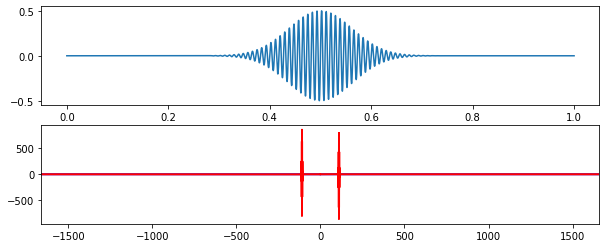

In [4]:
ftone = freq_slider.value
phase = phase_slider.value

taup = tau_slider.value/1000
t0 = t0_slider.value

x = 0.5*np.sin(2*np.pi*ftone*(taxis-t0)+phase)*np.exp(-(taxis-t0)**2/(2.0*taup**2))

ft = np.fft.fft(x)

plt.figure(figsize=(10,4))

# Plot the time-domain signal
plt.subplot(2,1,1)
plt.plot(taxis, x)

# Plot the Fourier Transform
plt.subplot(2,1,2)
plt.plot(faxis, np.real(ft), 'b')
plt.plot(faxis, np.imag(ft), 'r')
plt.xlim(-1660,1660)

ipd.Audio(x, rate=fsamp, autoplay=True) # load a NumPy array